In [1]:
%load_ext autoreload
%autoreload 2

from cap.dehaze import dehaze as cap_dehaze
from dcp.dehaze import dehaze as dcp_dehaze
from config import config
# from measure import compute_psnr, compute_ssim
import os
from glob import glob
from matplotlib import pyplot as plt
import cv2
import numpy as np
import multiprocessing as mp
from tqdm import tqdm
from sklearn.metrics import mean_squared_error as compute_mse
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim

In [2]:
_RESIDE_PATH = 'D:\\data\\reside\\indoor_train'
_RESULT_PATH = '../result'

In [3]:
hazy_fold_path = os.path.join(_RESIDE_PATH,'hazy')
clear_fold_path = os.path.join(_RESIDE_PATH,'clear')

In [4]:
list_hazy_imgs = glob(os.path.join(hazy_fold_path, '*_10_*.png'))

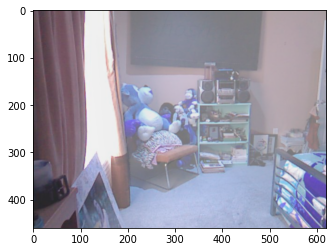

In [5]:
plt.imshow(cv2.imread(list_hazy_imgs[1]))

In [6]:
def get_clear(hazy_img_path, clear_fold_path):
    hazy_img_path = hazy_img_path.replace('\\', '/')
    clear_file = hazy_img_path.split('/')[-1].split('_')[0] + '.png'
    clear_img_path = os.path.join(clear_fold_path, clear_file)
    return clear_img_path

def pipeline_finetune(hazy, clear, method):
    if method == 'dcp':
        dehaze_img = dcp_dehaze(hazy, config['dcp'])
    else:
        dehaze_img = cap_dehaze(hazy, config['cap'])
    plt.imshow(dehaze_img)
    psnr = compute_psnr(clear_img, dehaze_img)
    ssim = compute_ssim(clear_img, dehaze_img, multichannel=True)
    return psnr, ssim

In [7]:
list_omegas = list(np.arange(0.5, 1.0, 0.1))
method = 'dcp'
# list_betas = list(np.arange(0.1, 2.0, 0.05))

beta: 0.500
dc (460, 620)
dark (460, 620)
dc (460, 620)
dark (460, 620)


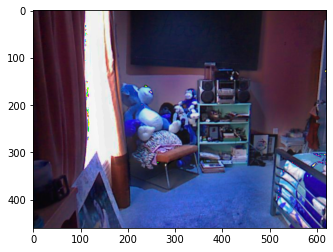

In [8]:
list_psnr = []
list_ssim = []
for b in list_omegas:
    print(f'beta: {b:.3f}')
    config['cap']['beta'] = b
    hazy_img = cv2.imread(list_hazy_imgs[1])
    clear = get_clear(list_hazy_imgs[1], clear_fold_path)
    clear_img = cv2.imread(clear)
    psnr, ssim = pipeline_finetune(hazy_img, clear_img, method)
    list_psnr.append(psnr)
    list_ssim.append(ssim)
    break

In [ ]:
# method = 'cap'

# for b in tqdm(list_omegas):
# #     config['cap']['beta'] = b
#     config['dcp']['omega'] = b
#     hazy_img = cv2.imread(list_hazy_imgs[1])
#     clear = get_clear(list_hazy_imgs[1], clear_fold_path)
#     clear_img = cv2.imread(clear)
#     psnr, ssim = pipeline_finetune(hazy_img, clear_img, method)
#     list_psnr.append(psnr)
#     list_ssim.append(ssim)
#     break

In [ ]:
list_psnr,list_ssim

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.ylim(10,30)
plt.plot(list_omegas,list_psnr)
# plt.plot(list_betas,list_ssim)
plt.legend(['PSNR by aerial perspective'], loc='upper right')
plt.xlabel('Omega')
plt.ylabel('PSNR dB')
plt.grid()
plt.savefig('../result/omega_dcp_psnr.png')
# plt.show()

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.ylim(0,1)
plt.plot(list_omegas,list_ssim)
# plt.plot(list_betas,list_ssim)
plt.legend(['SSIM by aerial perspective'], loc='upper right')
plt.xlabel('Omega')
plt.ylabel('SSIM')
plt.grid()
plt.savefig('../result/omega_dcp_ssim.png')
# plt.show()